#Install Packages

In [ ]:
!pip install --root-user-action=ignore -q qiskit;
!pip install --root-user-action=ignore -q qiskit-machine-learning;
!pip install --root-user-action=ignore -q qiskit-ibm-runtime
!pip install --root-user-action=ignore -q pylatexenc;

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

#Load Data

In [ ]:
df.head()

,Nano,x1,x2,x3,x4
0,0,8.22,0.6443,37.0,31.1
1,0,10.50,0.8211,37.0,268.7
2,0,9.67,0.7584,37.1,243.5
3,0,8.39,0.6573,37.1,61.3
4,0,6.33,0.4964,37.1,83.1


In [ ]:
#Load Data
import pandas as pd
df = pd.read_csv('nano.csv')
#print(df.to_string())

df2 = df.copy()
df2.drop(['x2'], axis=1,inplace=True)
# Remove rows with missing target values
df2.dropna(axis=0, subset=['Nano'], inplace=True)
Y = df.Nano # Target variable
df2.drop(['Nano'], axis=1, inplace=True) # Removing target variable from training data

#train_data.drop(['Age'], axis=1, inplace=True) # Remove columns with null values

# Select numeric columns only
X = df2.copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, Y.shape))
#pd.concat([X, Y], axis=1).head() # Show first 5 training examples

Shape of input data: (1016, 3) and shape of target variable: (1016,)


#Train Model

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.metrics import accuracy_score
from qiskit import BasicAer
from qiskit import Aer

from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZFeatureMap, PauliFeatureMap, ZZFeatureMap, RealAmplitudes, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit.opflow import Z
from qiskit.algorithms.optimizers import COBYLA, SPSA, ADAM, L_BFGS_B, TNC, NFT
from qiskit.circuit.library import EfficientSU2

In [ ]:
##98% ACCURACY

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.metrics import accuracy_score
from qiskit import BasicAer
from qiskit import Aer

from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZFeatureMap, PauliFeatureMap, ZZFeatureMap, RealAmplitudes, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit.opflow import Z
from qiskit.algorithms.optimizers import COBYLA, SPSA, ADAM, L_BFGS_B, TNC, NFT
from qiskit.circuit.library import EfficientSU2

# Standardize the features
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Binarize labels
label_binarizer = LabelBinarizer()
y_train_onehot = label_binarizer.fit_transform(y_train)
y_test_onehot = label_binarizer.transform(y_test)

# Define the feature map
feature_map = PauliFeatureMap(feature_dimension=X.shape[1], reps=2, paulis = ['Z','Y','ZZ'])

# Define the optimizer
optimizer_1 = COBYLA(maxiter=100)

#Choose the optimizer
optimizer = optimizer_1

# Define the backend
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Define the variational circuit
var_circuit_2 = RealAmplitudes(num_qubits=X.shape[1], reps=4, entanglement='sca', insert_barriers=True)


# Choose which variational circuit to use
var_circuit = var_circuit_2

# Create the VQC model
vqc = VQC(feature_map=feature_map, ansatz=var_circuit, optimizer=optimizer, quantum_instance=quantum_instance)

# Train and evaluate the VQC model
vqc.fit(X_train, y_train_onehot)
y_pred_vqc = vqc.predict(X_test)
accuracy_vqc = accuracy_score(y_test_onehot, y_pred_vqc)

print(f'VQC accuracy: {accuracy_vqc}')

<ipython-input-8-b1a1fd49b82c>:53: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024)
<ipython-input-8-b1a1fd49b82c>:65: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(feature_map=feature_map, ansatz=var_circuit, optimizer=optimizer, quantum_instance=quantum_instance)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


VQC accuracy: 0.9558823529411765


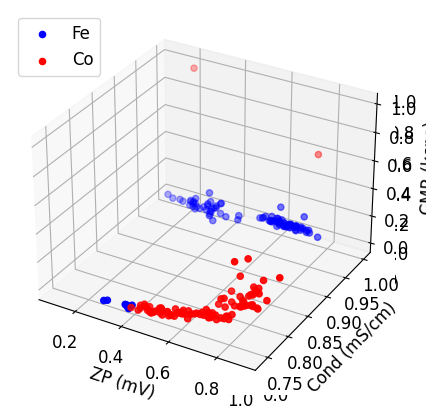

In [ ]:
# Create the 3D scatter plotpred = y_pred_SVM
pred=y_pred_vqc
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,1], X_test[pred==0,2], c='blue', marker='o', label='Fe')
ax.scatter(X_test[pred==1,0], X_test[pred==1,1], X_test[pred==1,2], c='red', marker='o', label='Co')
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
ax.set_zlabel('CMR (kcps)')
ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
# ax.set_box_aspect((1.5,1.5,1))
#plt.savefig('./results/scatter_test_svm.jpg', dpi=300, bbox_inches='tight')
#plt.tight_layout
#plt.show()

In [ ]:
#Confusion Matrix
year_results = y_test_onehot.reshape((204, ))
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test_onehot, y_pred_vqc)
print(cf_matrix)

[[ 94   2]
 [  7 101]]


In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(year_results, y_pred_vqc)
roc_auc=metrics.auc(fpr, tpr)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test_onehot, y_pred_vqc)
print(cf_matrix)
year_results = y_test_onehot.reshape((204, ))
#Create and sort data frame for ROC plot
roc_data = {"TPR": tpr, "FPR": fpr}
roc_df_logit = pd.DataFrame(roc_data).sort_values(by = ["TPR", "FPR"])
roc_df_logit
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(year_results, y_pred_vqc)
roc_auc=metrics.auc(fpr, tpr)
#Integrate under ROC curve to get AUC
auc = np.trapz(roc_df_logit["TPR"], roc_df_logit["FPR"])
#Create and sort data frame for ROC plot
roc_data = {"TPR": tpr, "FPR": fpr}
roc_df_logit = pd.DataFrame(roc_data).sort_values(by = ["TPR", "FPR"])
roc_df_logit

[[ 94   2]
 [  7 101]]


,TPR,FPR
0,0.000000,0.000000
1,0.935185,0.020833
2,1.000000,1.000000


In [ ]:
print(thresholds)

[2 1 0]


In [ ]:
#Create and sort data frame for ROC plot
roc_data = {"TPR": tpr, "FPR": fpr}
roc_df_logit = pd.DataFrame(roc_data).sort_values(by = ["TPR", "FPR"])
roc_df_logit

,TPR,FPR
0,0.000000,0.000000
1,0.935185,0.020833
2,1.000000,1.000000


In [ ]:
#Integrate under ROC curve to get AUC
auc = np.trapz(roc_df_logit["TPR"], roc_df_logit["FPR"])

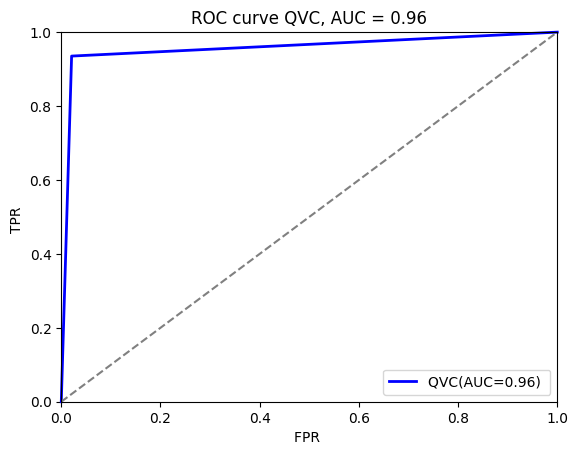

In [ ]:
#Plot figure
plt.plot(roc_df_logit["FPR"], roc_df_logit["TPR"], linestyle = '-', color = 'blue', lw = 2, clip_on = False)
plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR ')
plt.ylabel('TPR ')
plt.title('ROC curve QVC, AUC = %.2f'%auc)
#plt.legend(loc ="lower right")
plt.show()

<Axes: >

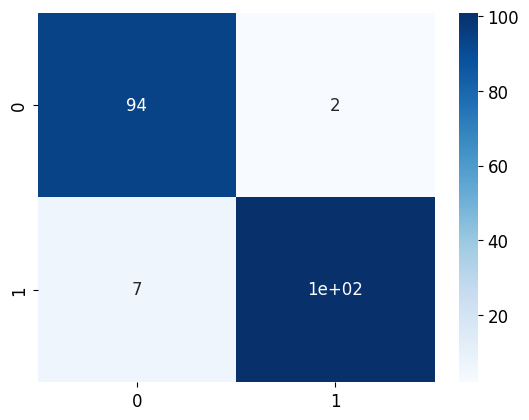

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

<Axes: >

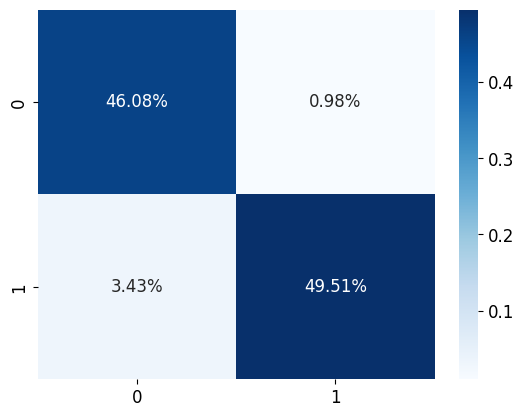

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

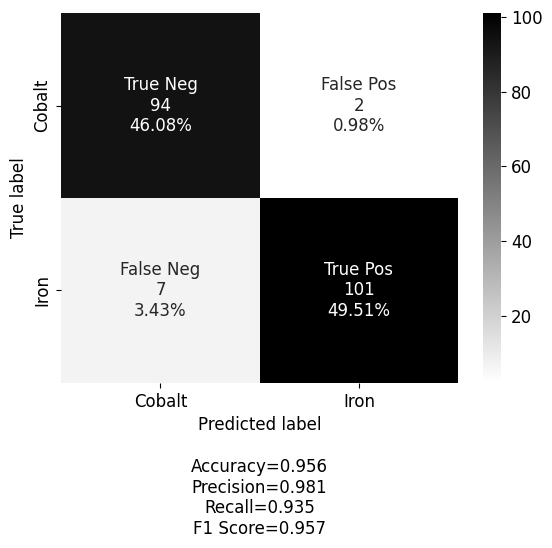

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Cobalt', 'Iron']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
pip install roc-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Function to get the confidence interval

from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

In [ ]:
#Function to get the confidence interval
roc_auc_ci(year_results, y_pred_vqc )

(0.9291123871504203, 0.9852394647014313)

In [ ]:
base_fpr = np.linspace(0, 1, 101)

#tprs = np.array(tprs)
mean_tprs = tpr.mean(axis=0)
std = tprs.std(axis=0)

tprs = []
aucs = []

tprs=tpr

#mean_auc = auc(base_fpr, mean_tprs)
mean_auc =metrics.auc(fpr, tpr)
std_auc = np.std(auc)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.figure(figsize=(12, 8))
plt.plot(base_fpr, mean_tprs, 'b', alpha = 0.8, label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),)
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color = 'blue', alpha = 0.2)
plt.plot([0, 1], [0, 1], linestyle = '--', lw = 2, color = 'r', label = 'Luck', alpha= 0.8)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.title('Receiver operating characteristic (ROC) curve')
#plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [ ]:
fpr

array([0.        , 0.02083333, 1.        ])

#Reduce Train Size

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#X_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.7)
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01,criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(dt.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))

1.0
1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

LinearSVM = LinearSVC().fit(X_train, y_train)
print("training set score: %f" % LinearSVM.score(X_train, y_train))
print("test set score: %f" % LinearSVM.score(X_test, y_test))

training set score: 0.998594
test set score: 1.000000


In [ ]:
LinearSVM = LinearSVC().fit(X_train, y_train)
print("training set score: %f" % LinearSVM.score(X_train, y_train))
print("test set score: %f" % LinearSVM.score(X_test, y_test))

training set score: 0.833333
test set score: 0.491573


In [ ]:
#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.1 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.1 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

In [ ]:
##Reduce training data

# Standardize the features
# Standardize the features
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.005 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.005 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

# Binarize labels
label_binarizer = LabelBinarizer()
y_train_onehot = label_binarizer.fit_transform(y_train)
y_test_onehot = label_binarizer.transform(y_test)

# Define the feature map
feature_map = PauliFeatureMap(feature_dimension=X.shape[1], reps=2, paulis = ['Z','Y','ZZ'])

# Define the optimizer
optimizer_1 = COBYLA(maxiter=100)

#Choose the optimizer
optimizer = optimizer_1

# Define the backend
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Define the variational circuits
var_circuit_2 = RealAmplitudes(num_qubits=X.shape[1], reps=2, entanglement='linear', insert_barriers=True)

# Choose which variational circuit to use
var_circuit = var_circuit_2

# Create the VQC model
vqc = VQC(feature_map=feature_map, ansatz=var_circuit, optimizer=optimizer, quantum_instance=quantum_instance)

# Train and evaluate the VQC model
vqc.fit(X_train, y_train_onehot)
y_pred_vqc = vqc.predict(X_test)
accuracy_vqc = accuracy_score(y_test_onehot, y_pred_vqc)

print(f'VQC accuracy: {accuracy_vqc}')

<ipython-input-39-d3aa40480b00>:53: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


VQC accuracy: 0.9377049180327869


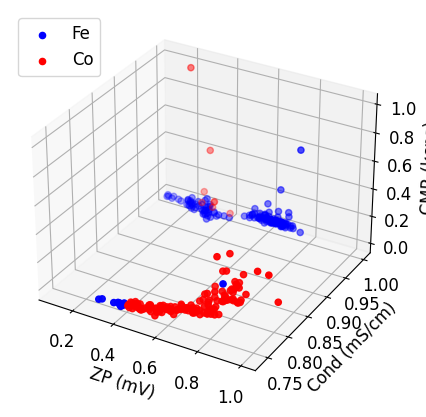

In [ ]:
# Create the 3D scatter plotpred = y_pred_SVM
pred=y_pred_vqc
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
#ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,1], X_test[pred==0,2], c='blue', marker='o', label='Fe')
ax.scatter(X_test[pred==1,0], X_test[pred==1,1], X_test[pred==1,2], c='red', marker='o', label='Co')
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
ax.set_zlabel('CMR (kcps)')
ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
#ax.set_box_aspect((1.5,1.5,1))
#plt.savefig('./results/scatter_test_svm.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout
plt.show()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test_onehot, y_pred_vqc)
print(cf_matrix)


[[148   8]
 [ 11 138]]


<Axes: >

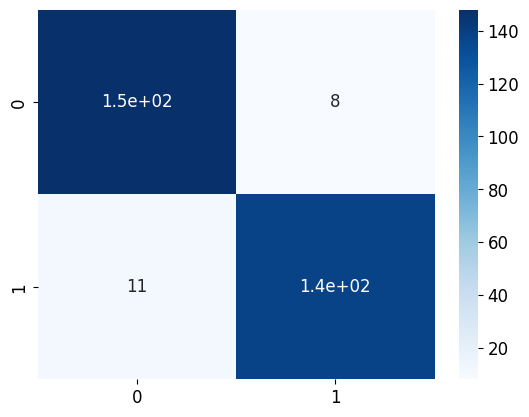

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

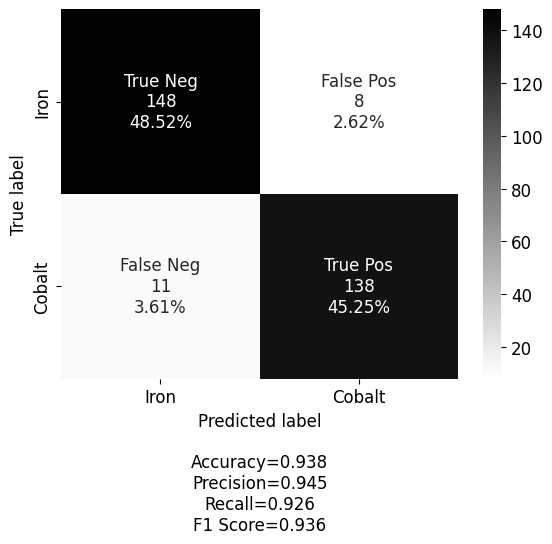

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Iron','Cobalt']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
year_results = y_test_onehot.reshape((305, ))

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(year_results, y_pred_vqc)
roc_auc=metrics.auc(fpr, tpr)

In [ ]:
thresholds

array([2, 1, 0])

In [ ]:
#Create and sort data frame for ROC plot
roc_data = {"TPR": tpr, "FPR": fpr}
roc_df_logit = pd.DataFrame(roc_data).sort_values(by = ["TPR", "FPR"])
roc_df_logit

,TPR,FPR
0,0.000000,0.000000
1,0.926174,0.051282
2,1.000000,1.000000


In [ ]:
#Create and sort data frame for ROC plot
roc_data = {"TPR": tpr, "FPR": fpr}
roc_df_logit = pd.DataFrame(roc_data).sort_values(by = ["TPR", "FPR"])
roc_df_logit
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(year_results, y_pred_vqc)
roc_auc=metrics.auc(fpr, tpr)
#Integrate under ROC curve to get AUC
auc = np.trapz(roc_df_logit["TPR"], roc_df_logit["FPR"])

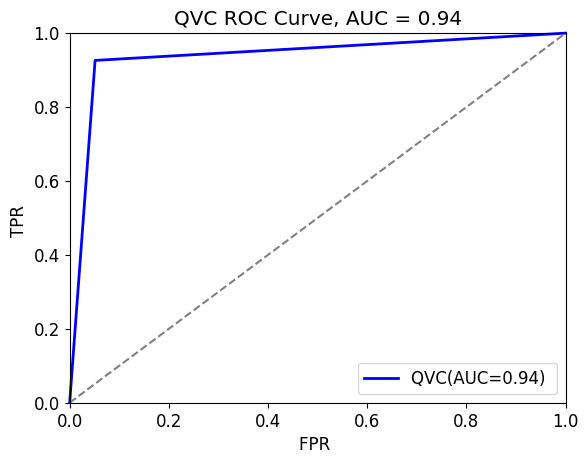

In [ ]:
#Plot figure
plt.plot(roc_df_logit["FPR"], roc_df_logit["TPR"], linestyle = '-', color = 'blue', lw = 2, clip_on = False)
plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR ')
plt.ylabel('TPR ')
plt.title('QVC ROC Curve, AUC = %.2f'%auc)
#plt.legend(loc ="lower right")
plt.show()

<Axes: >

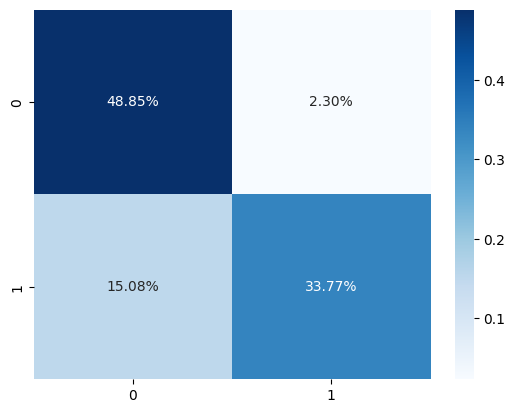

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

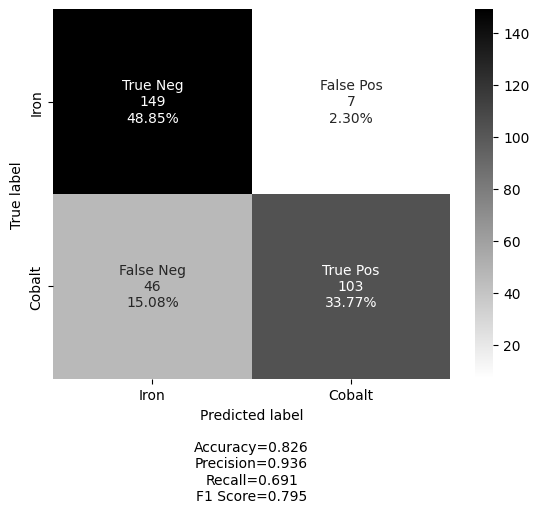

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Iron','Cobalt']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

<Axes: >

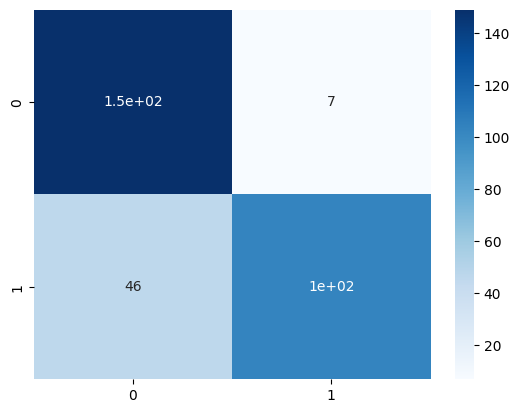

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [ ]:
###We import the model that will be used. from sklearn.linear_model import LogisticRegression.
from sklearn.linear_model import LogisticRegression
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

# Create an instance of the model.
logreg = LogisticRegression()

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.5 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.5 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]


# Training the model.
logreg.fit(X_train,y_train)
# Do prediction.
y_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9592696629213483


In [ ]:
# Analyzing the results.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[333,  29],
       [  0, 350]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import tree
import xgboost as xgb
from sklearn import svm

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(1 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(1 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

# Binarize labels
label_binarizer = LabelBinarizer()
y_train_onehot = label_binarizer.fit_transform(y_train)
y_test_onehot = label_binarizer.transform(y_test)



0.8507080984463082

In [ ]:
#xgb_cl = xgb.XGBClassifier(n_estimators=12, learning_rate=2.0,max_depth=1, random_state=42)

#xgb_cl = LogisticRegression(random_state=0)

#xgb_cl = svm.LinearSVC()

xgb_cl =tree.DecisionTreeClassifier()


# Init classifier
#xgb_cl = xgb.XGBClassifier()

# Fit
clf=xgb_cl.fit(X_train, y_train)

# Predict
preds = clf.predict(X_test)

# Score
accuracy_score(y_test_onehot, preds)
0.8507080984463082

0.8507080984463082

In [ ]:
from sklearn.metrics import accuracy_score

import xgboost as xgb

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.05 * num_x)
index = range(num_x)

#X_train=X_train[index[:num_train]]

X_train=get_middle(X_train,0.1)

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.05 * num_y)
index_y = range(num_y)

#y_train=y_train.iloc[:num_train_y]

y_train=get_middle(y_train,0.1)

xgb_cl = xgb.XGBClassifier()

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

0.8507080984463082

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#model = LogisticRegression(solver=’liblinear’, random_state=0)


from sklearn.metrics import accuracy_score

import xgboost as xgb

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.1 * num_x)
index = range(num_x)

#X_train=X_train[index[:num_train]]

X_train=get_middle(X_train,0.1)

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.1 * num_y)
index_y = range(num_y)

#y_train=y_train.iloc[:num_train_y]

y_train=get_middle(y_train,0.1)

xgb_cl = xgb.XGBClassifier()

# Init classifier
xgb_cl = xgb.XGBClassifier()

#liblinear’

xgb_cl =LogisticRegression(solver='sag', random_state=42)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7078651685393258

In [ ]:
from sklearn.metrics import accuracy_score

import xgboost as xgb

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42, stratify=Y)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.5 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.5 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

xgb_cl = xgb.XGBClassifier()

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

0.8507080984463082

In [ ]:
#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.1 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.1 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

In [ ]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#X, y = load_digits(return_X_y=True)
naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

#Learning Curve

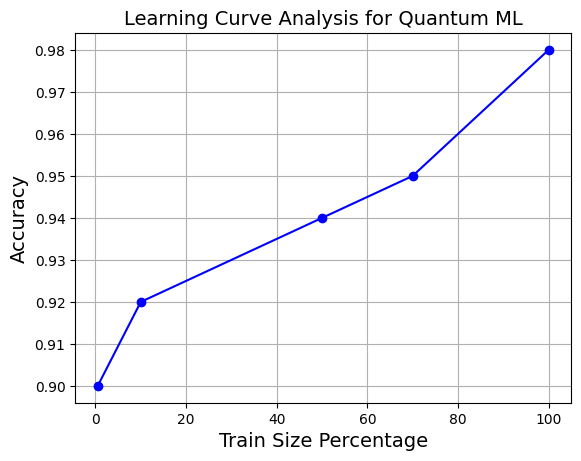

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.90, 0.92, 0.94, 0.95, 0.98]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for Quantum ML', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn import svm

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42, stratify=Y)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.05 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.05 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

svm_cl = LogisticRegression(random_state=0)

# Fit
svm_cl.fit(X_train, y_train)

# Predict
preds = svm_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7247191011235955

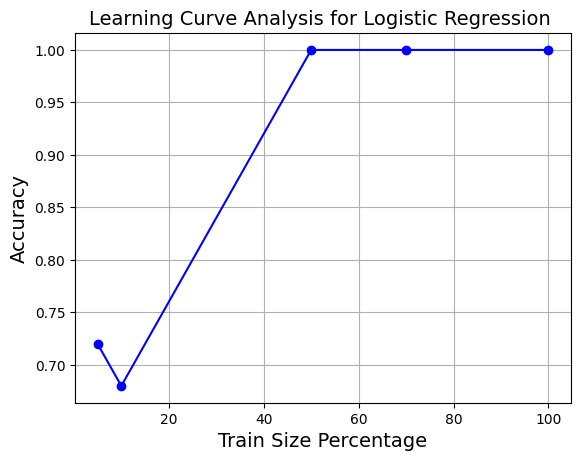

In [ ]:
import matplotlib.pyplot as plt

percentage = [5,10, 50, 70, 100]
accuracy = [0.72, 0.68, 1, 1, 1]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for Logistic Regression ', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

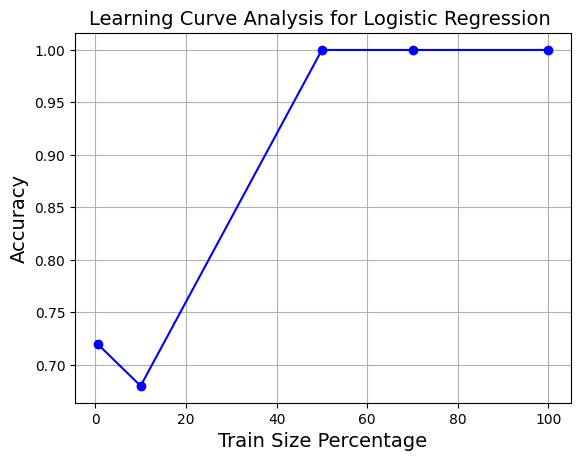

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.72, 0.68, 1, 1, 1]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for Logistic Regression ', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

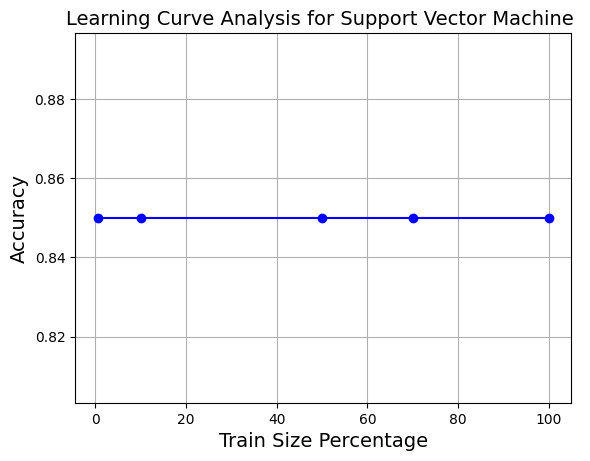

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.85, 0.85, 0.85, 0.85, 0.85]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for Support Vector Machine ', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn import svm

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42, stratify=Y)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.05 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.05 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

svm_cl = svm.SVC()

# Fit
svm_cl.fit(X_train, y_train)

# Predict
preds = svm_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

#clf = svm.SVC()

0.8507080984463082

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn import svm

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.1 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.1 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

svm_cl = svm.SVC()

# Fit
svm_cl.fit(X_train, y_train)

# Predict
preds = svm_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.9985955056179775

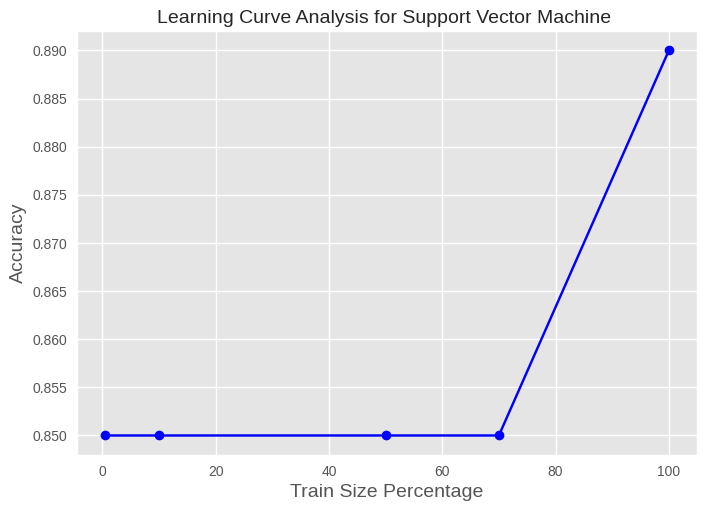

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.85, 0.85, 0.85, 0.85, 0.89]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for Support Vector Machine ', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42, stratify=Y)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.05 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.05 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

svm_cl = KNeighborsClassifier(n_neighbors=5)

# Fit
svm_cl.fit(X_train, y_train)

# Predict
preds = svm_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

#clf = svm.SVC()

0.8507080984463082

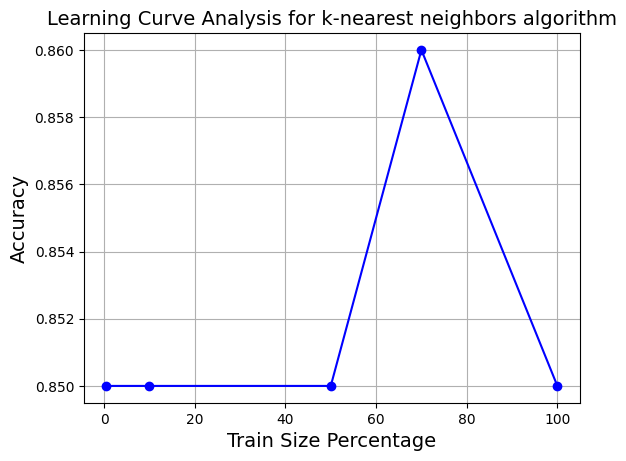

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.85, 0.85, 0.85, 0.86, 0.85]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for k-nearest neighbors algorithm', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

import xgboost as xgb

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42, stratify=Y)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.7 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.7 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

xgb_cl = xgb.XGBClassifier()

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

#clf = svm.SVC()

0.8507080984463082

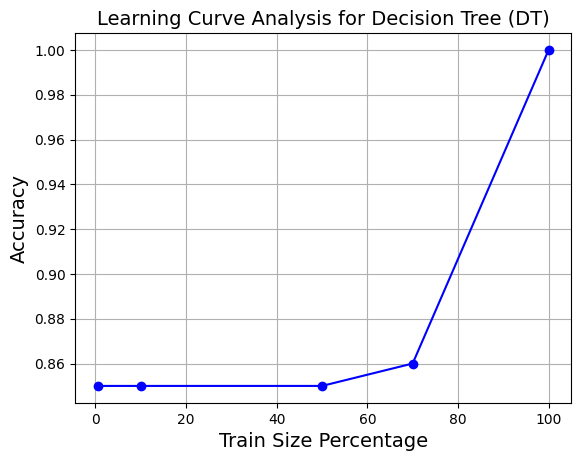

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.85,0.85,  0.85, 0.86, 1]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis for Decision Tree (DT)', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.1 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.1* num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

from sklearn.tree import DecisionTreeClassifier

# Init classifier
dt_cl = DecisionTreeClassifier(random_state=2)

# Fit
dt_cl.fit(X_train, y_train)

# Predict
preds = dt_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

0.8507080984463082

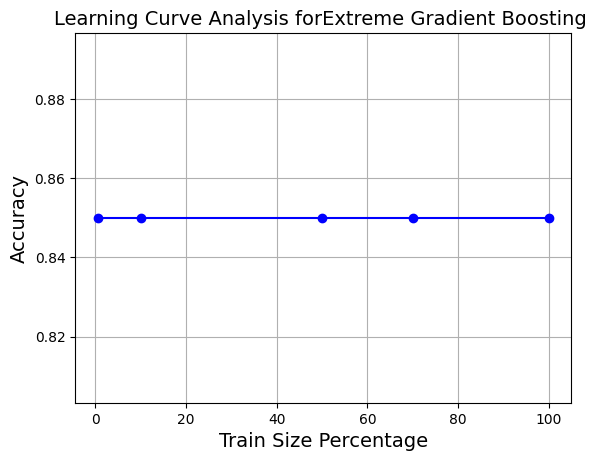

In [ ]:
import matplotlib.pyplot as plt

percentage = [0.5, 10, 50, 70, 100]
accuracy = [0.85, 0.85, 0.85, 0.85, 0.85]

plt.plot(percentage, accuracy, color='blue', marker='o')
plt.title('Learning Curve Analysis forExtreme Gradient Boosting ', fontsize=14)
plt.xlabel('Train Size Percentage', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

import xgboost as xgb

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

#Reduce Size of train set:
num_x = len(X_train)
num_train = int(0.05 * num_x)
index = range(num_x)

X_train=X_train[index[:num_train]]

#Reduce Size of train set:
num_y = len(y_train)
num_train_y = int(0.05 * num_y)
index_y = range(num_y)

y_train=y_train.iloc[:num_train_y]

xgb_cl = xgb.XGBClassifier()

# Init classifier
#xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082

0.8507080984463082